In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

데이터 확인

============flair.shape============
(240, 240, 155)
============t1.shape============
(240, 240, 155)
============t1ce.shape============
(240, 240, 155)
============t2.shape============
(240, 240, 155)
============seg.shape============
(240, 240, 155)
============seg[:,:,80] analyze============
(array([0., 1., 2., 4.]), array([54667,   275,  1677,   981], dtype=int64))


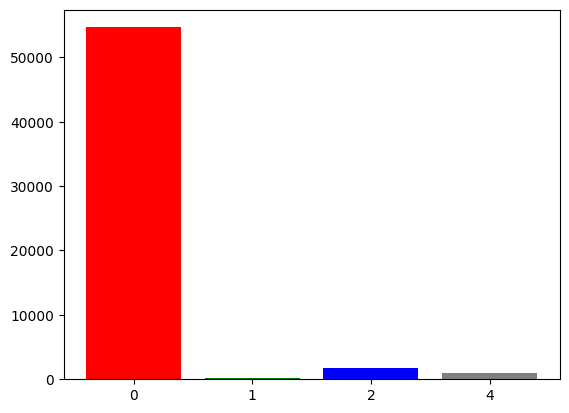

In [2]:
img_id='01281'
flair_data = [[[]]]
seg_data = [[[]]]
for i, nil in enumerate([f'./dataset/BraTS2021/BraTS2021_Training_Data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):
    image=nib.load(nil).get_fdata()
    title=nil.rsplit("_",1)[1].split(".",1)[0]
    if title == 'flair':
        flair_data=image
    elif title == 'seg':
        seg_data=image
    print(f'============{title}.shape============')
    print(image.shape)

print(f'============seg[:,:,80] analyze============')
seg=seg_data[:,:,80]
seg_array=seg.flatten()
x = np.arange(4)
values=[int(num) for num in np.unique(seg_array,return_counts=True)[1]]
titles=[int(num) for num in np.unique(seg_array)]
plt.bar(x,values,color=['r','g','b','gray'])
plt.xticks(x, titles)
print(np.unique(seg_array,return_counts=True))

시각화

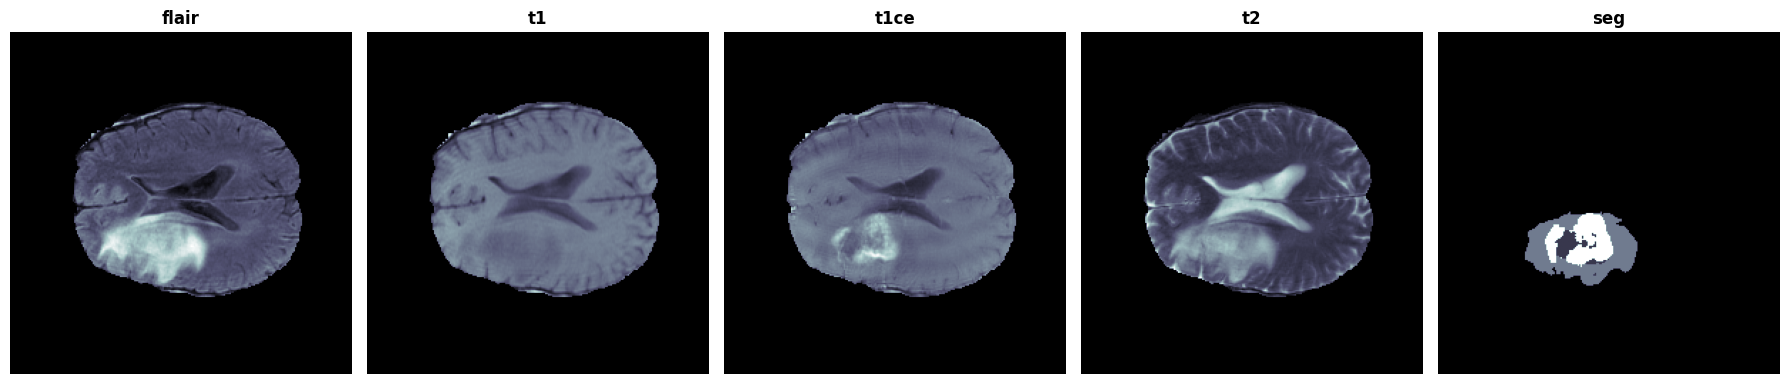

In [3]:
img_id='01281'
plt.figure(figsize=(18,5))
for i, nil in enumerate([f'./dataset/BraTS2021/BraTS2021_Training_Data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):
    plt.subplot(1,5,i+1)
    image=nib.load(nil).get_fdata()
    title=nil.rsplit("_",1)[1].split(".",1)[0]
    plt.title(title,fontweight='bold')
    plt.axis(False)
    plt.imshow(image[:,:,80],cmap='bone')
plt.tight_layout()
plt.show()

모든 스캔

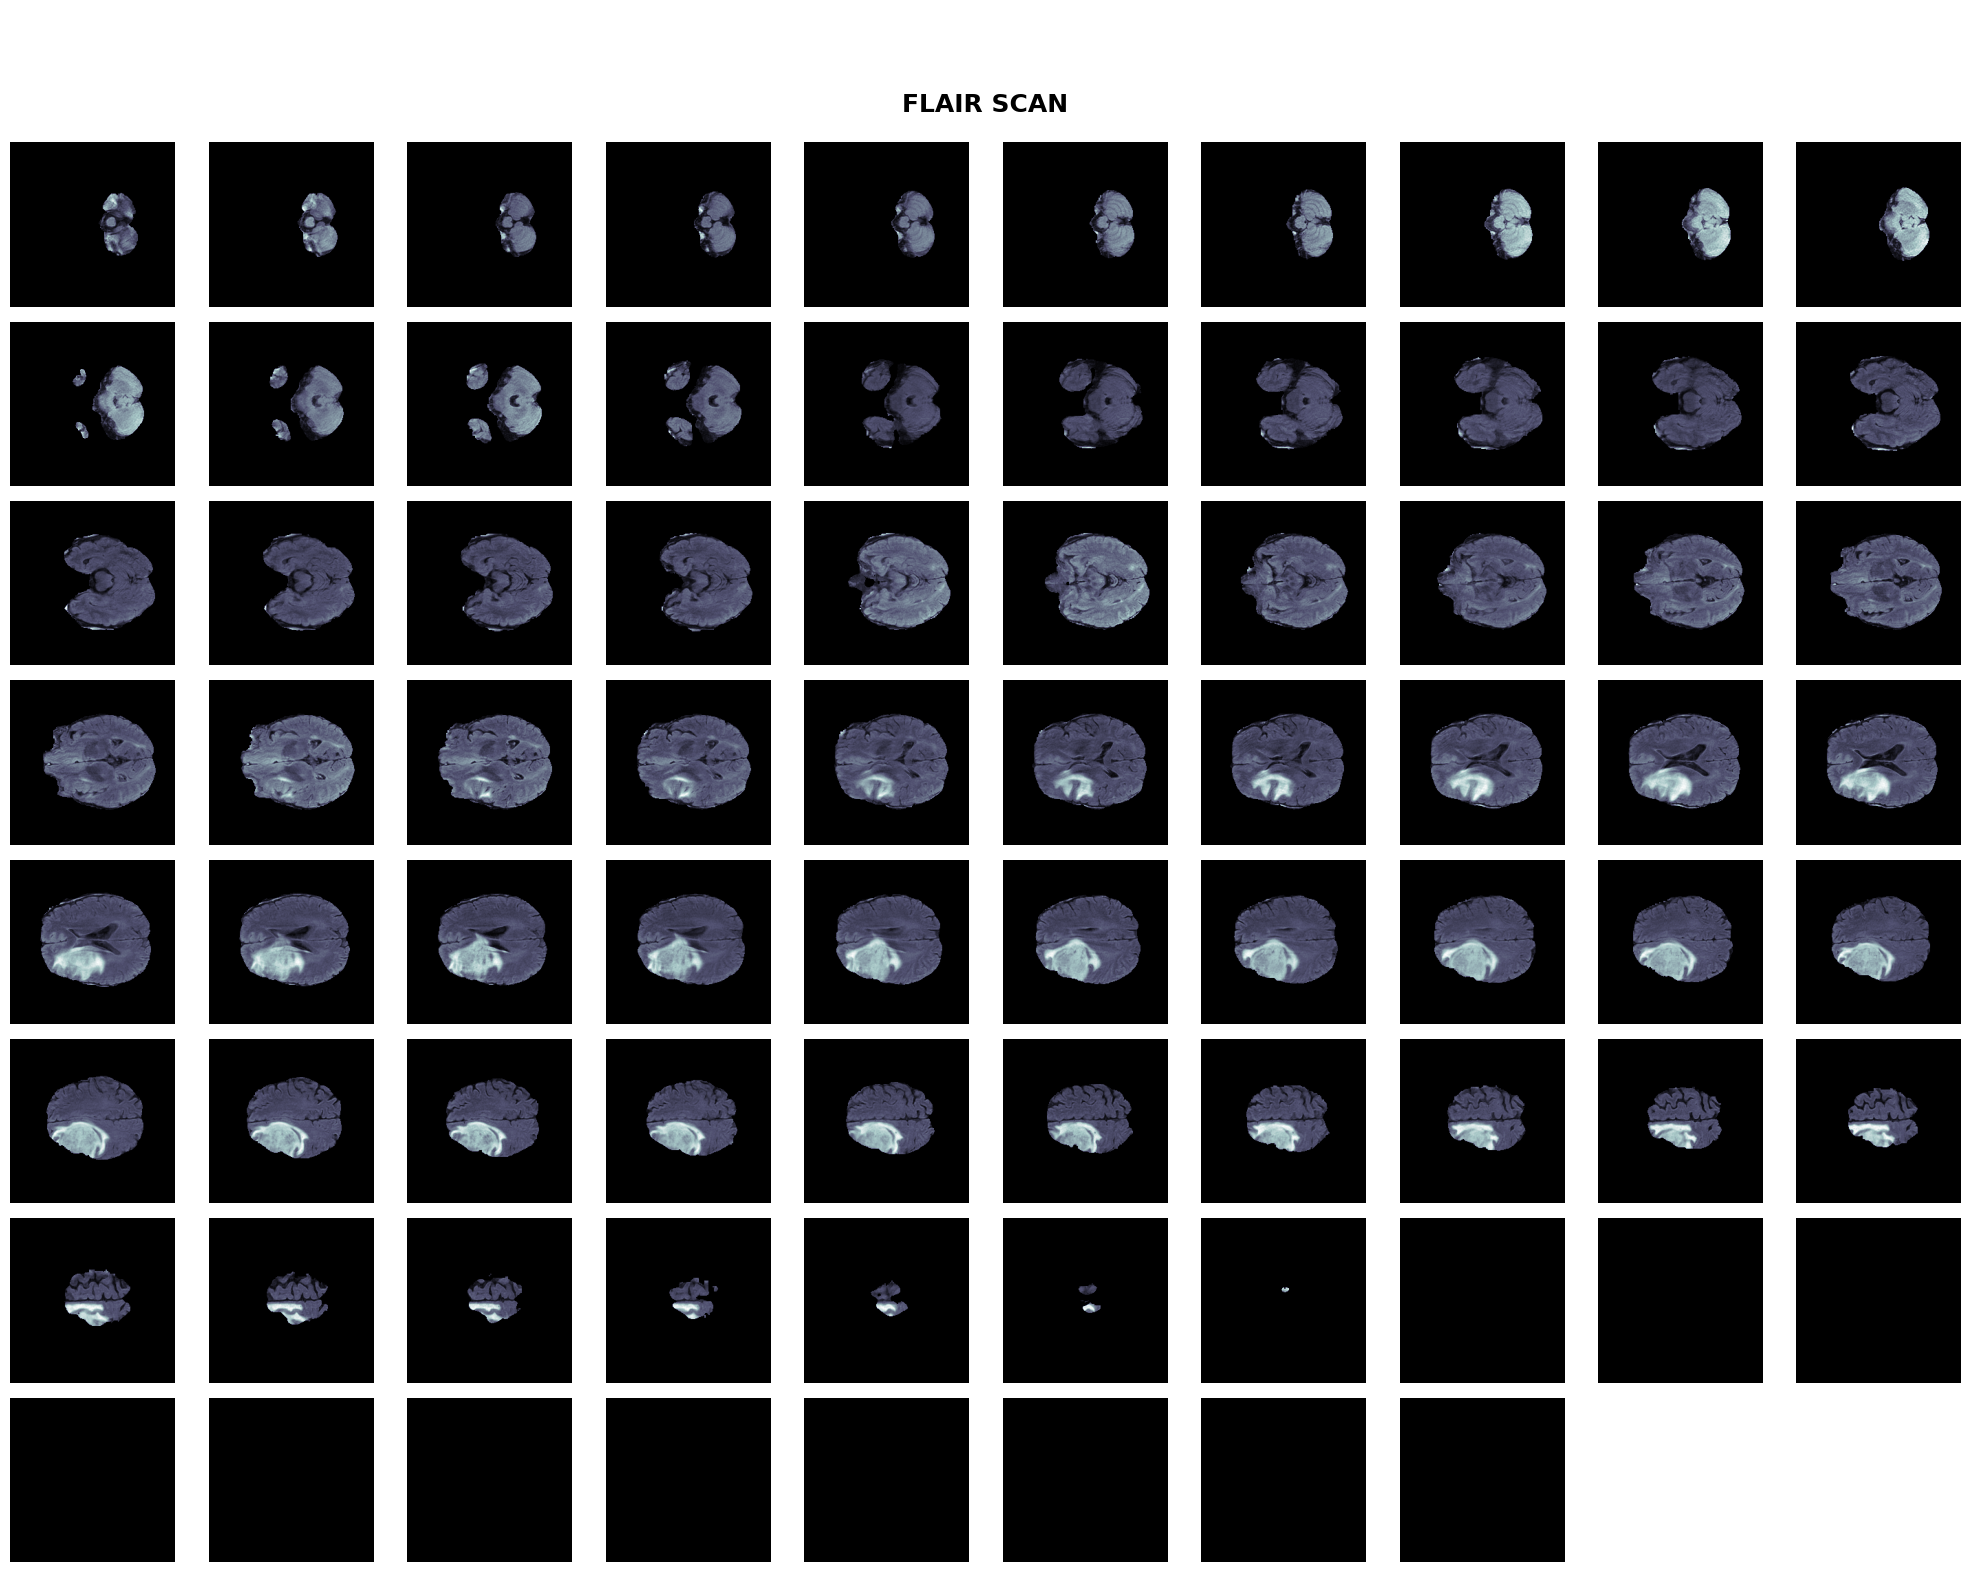

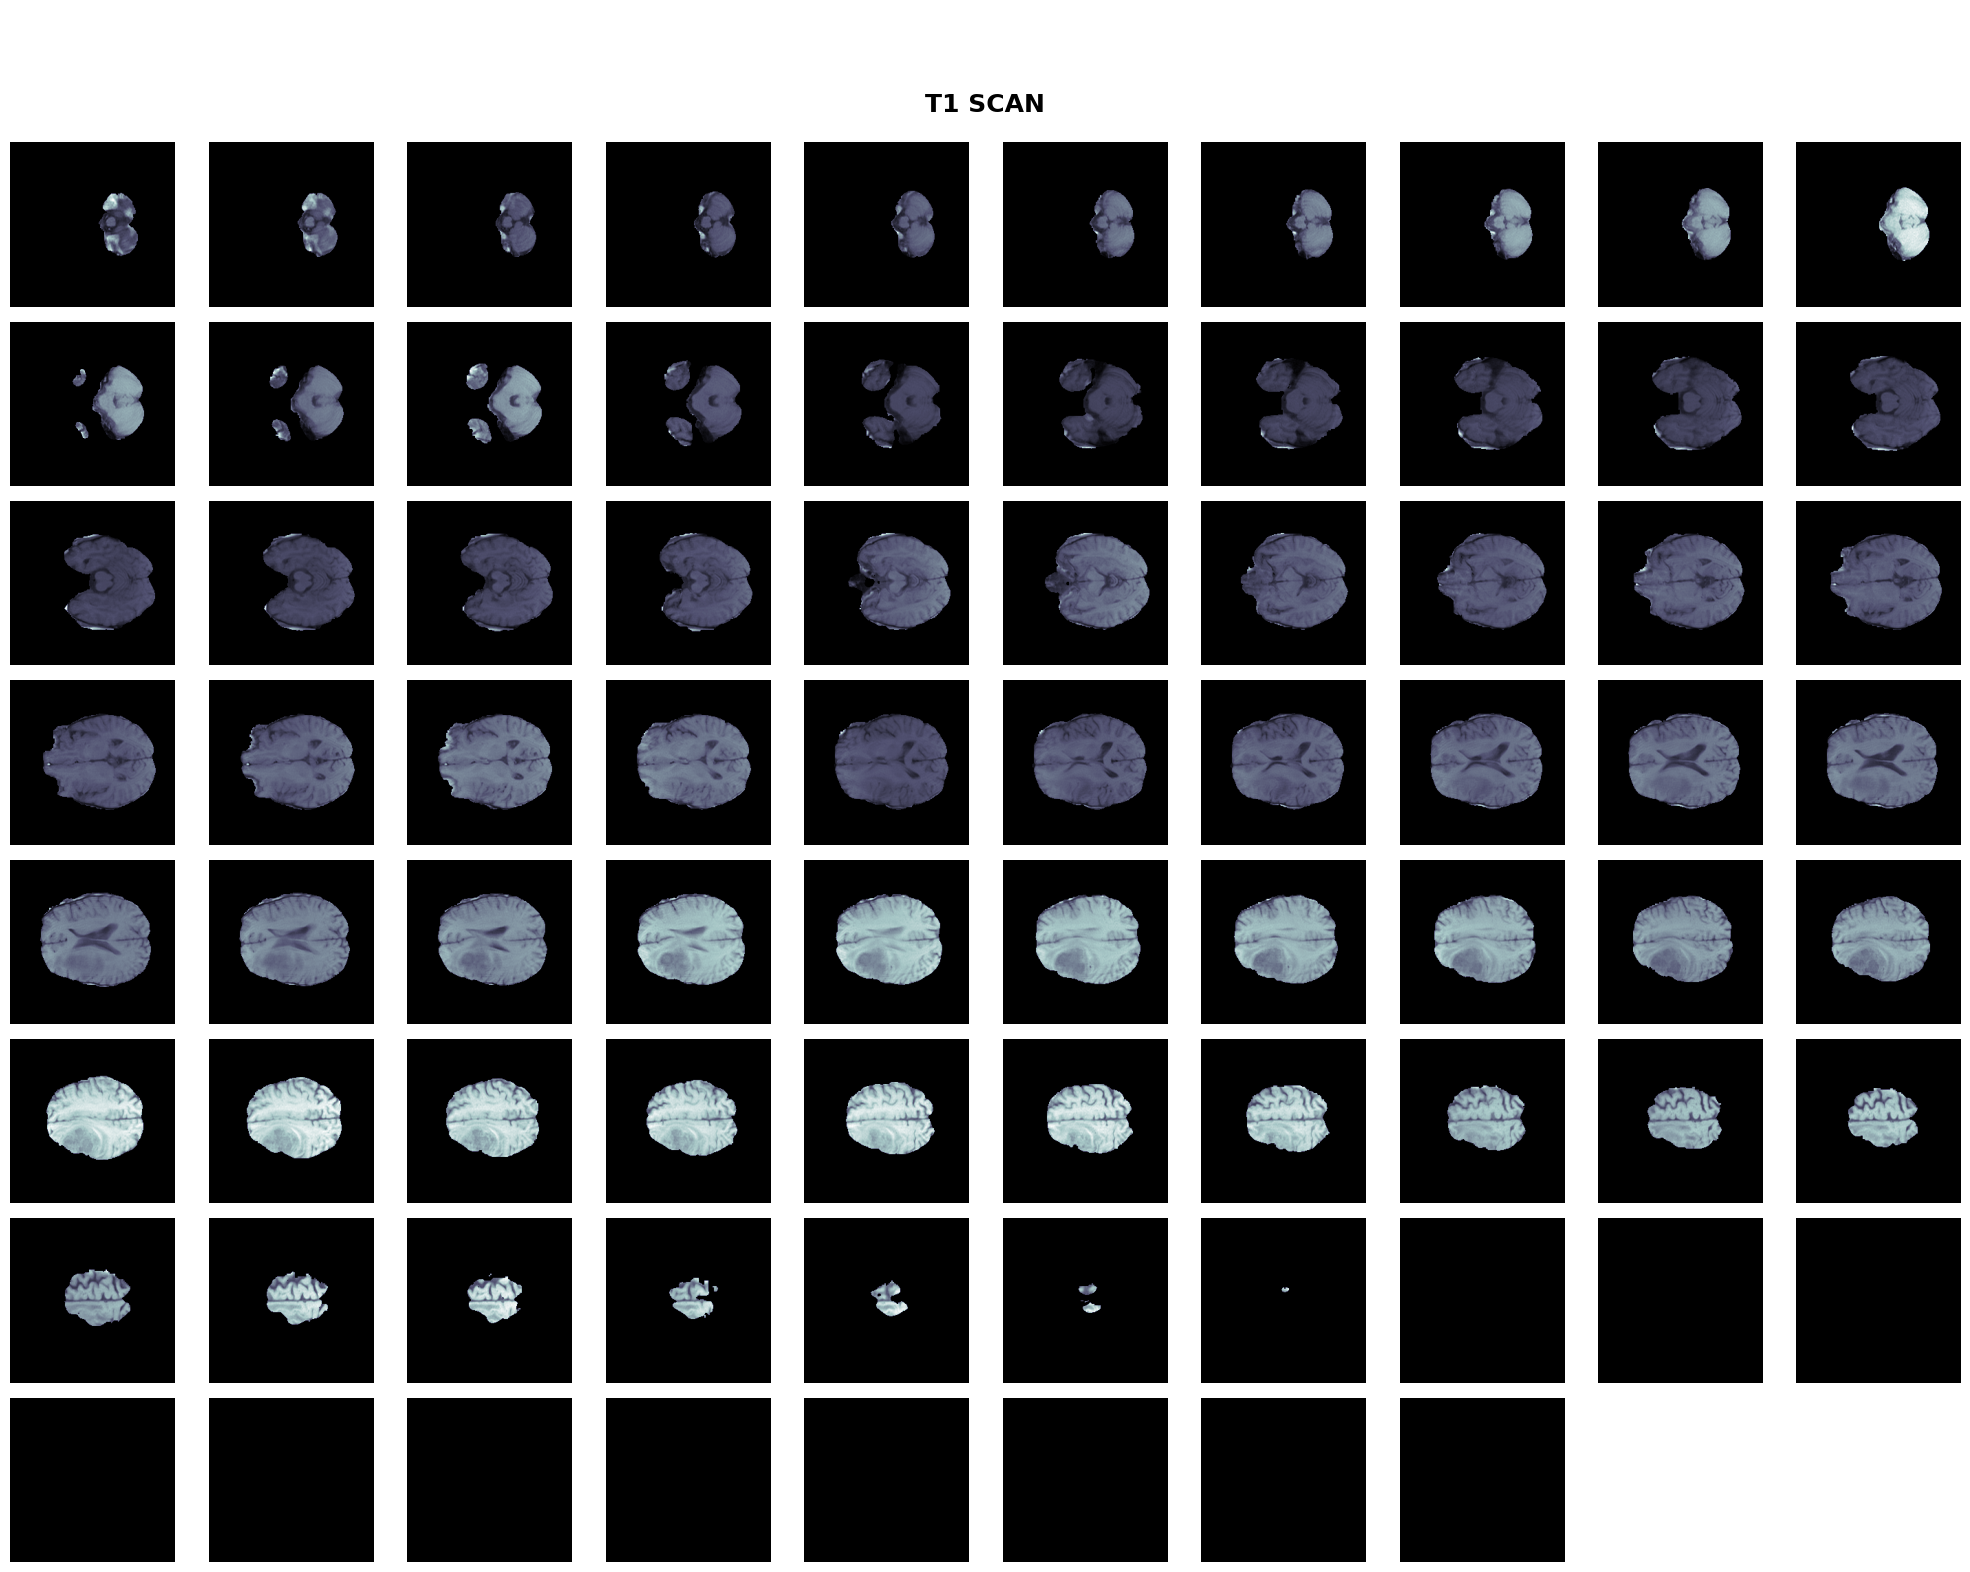

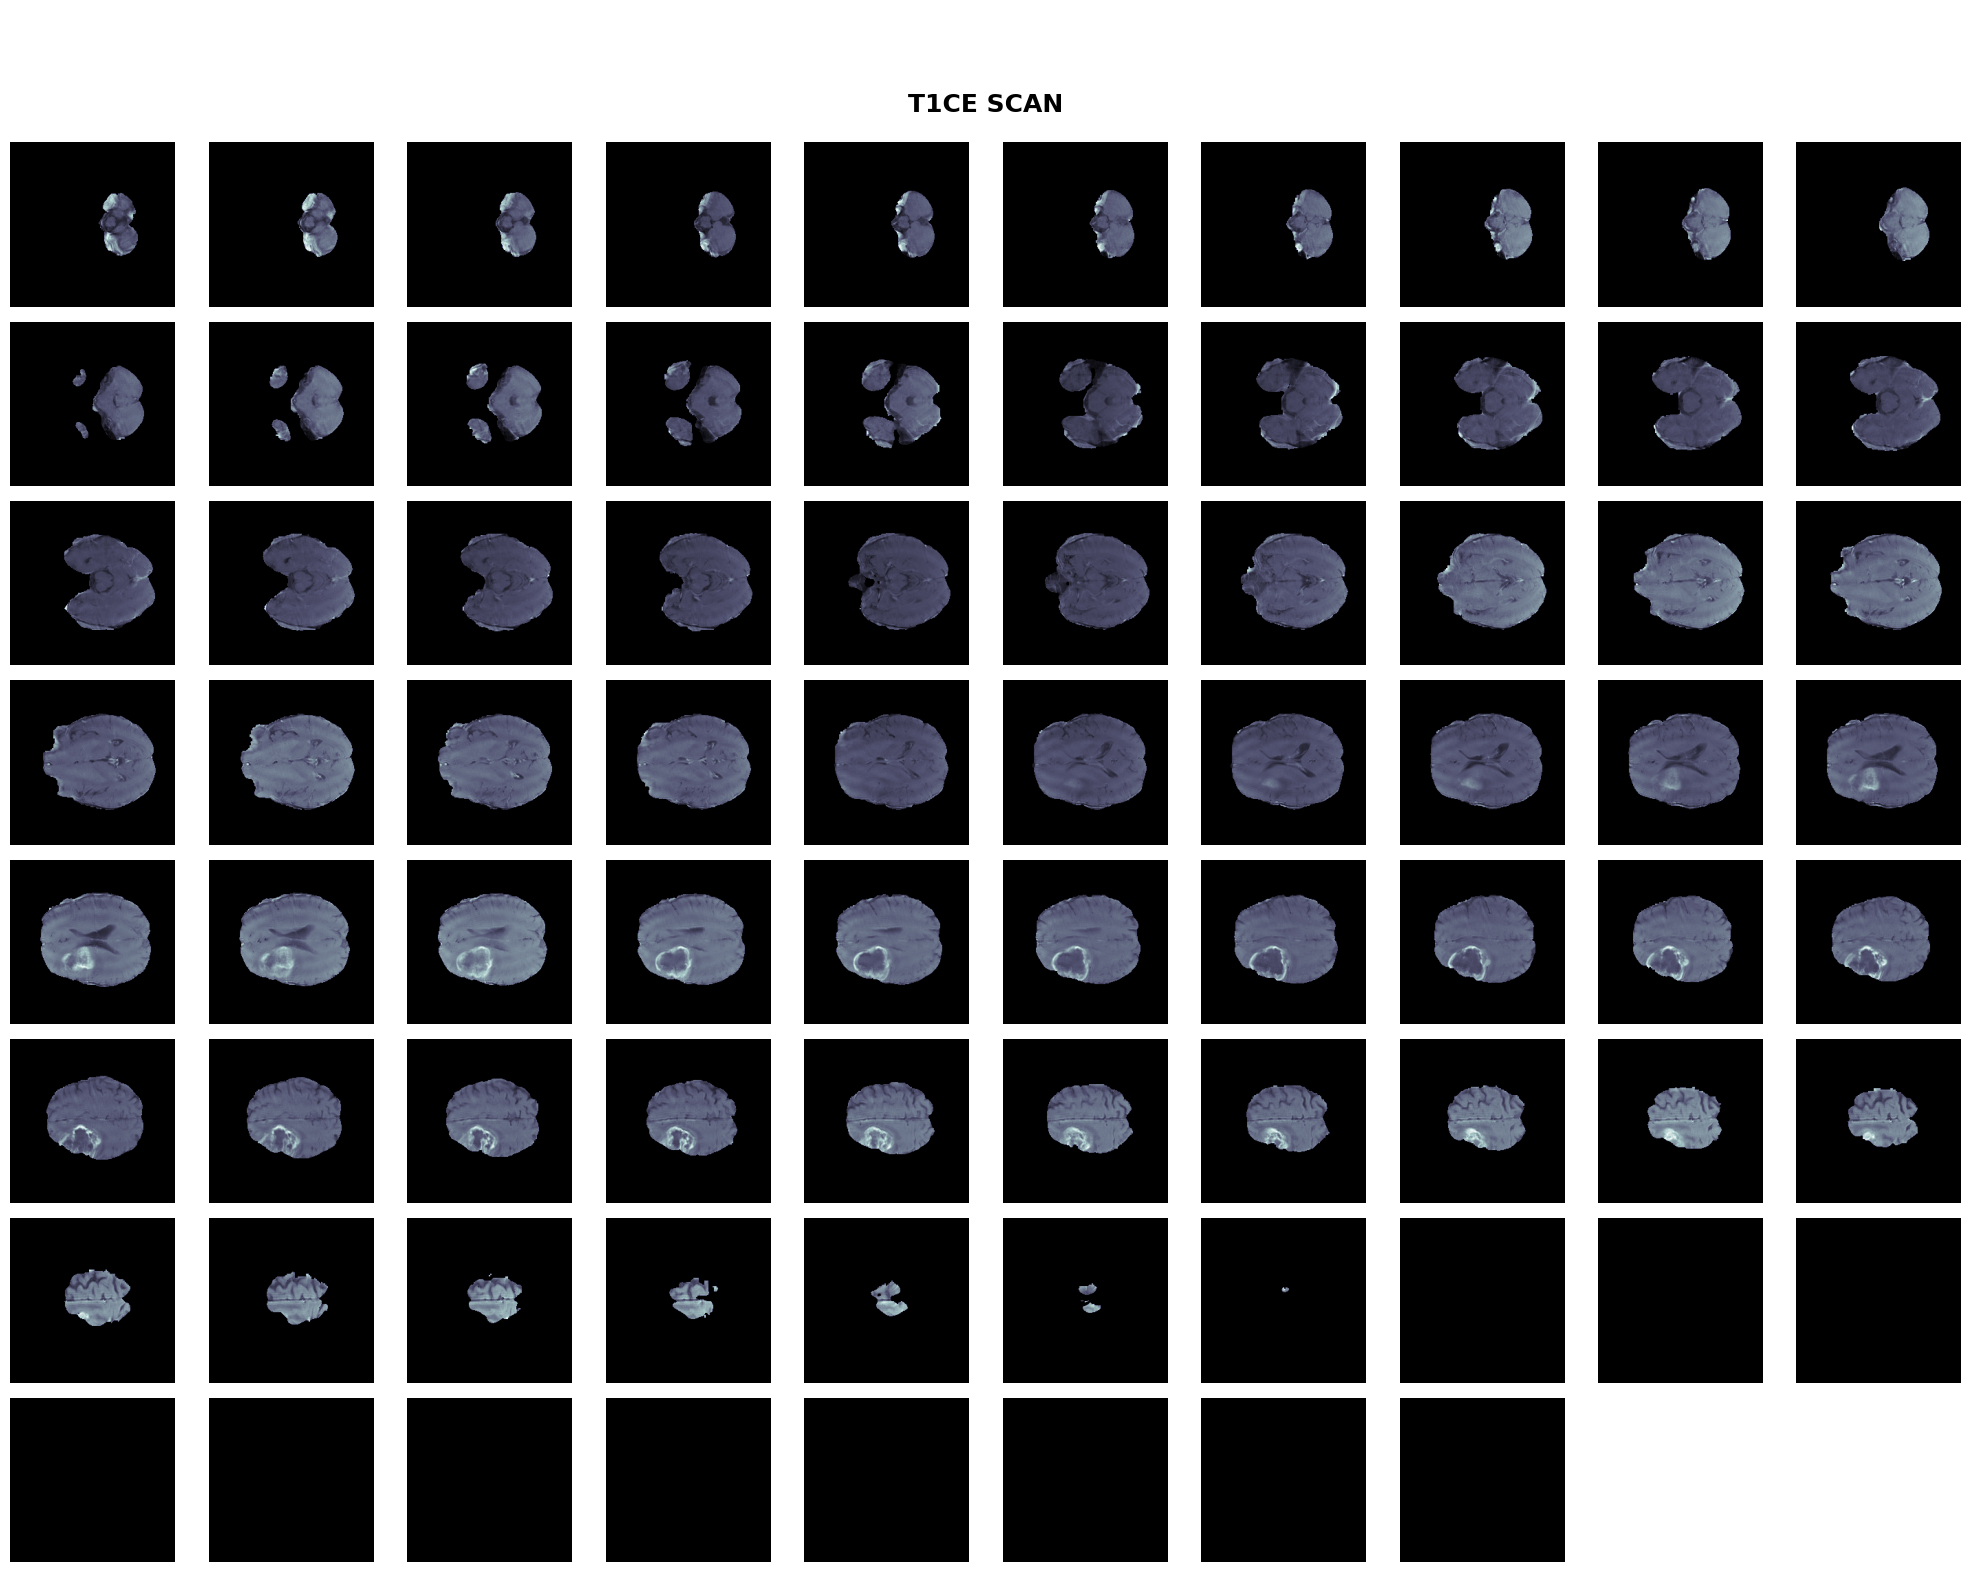

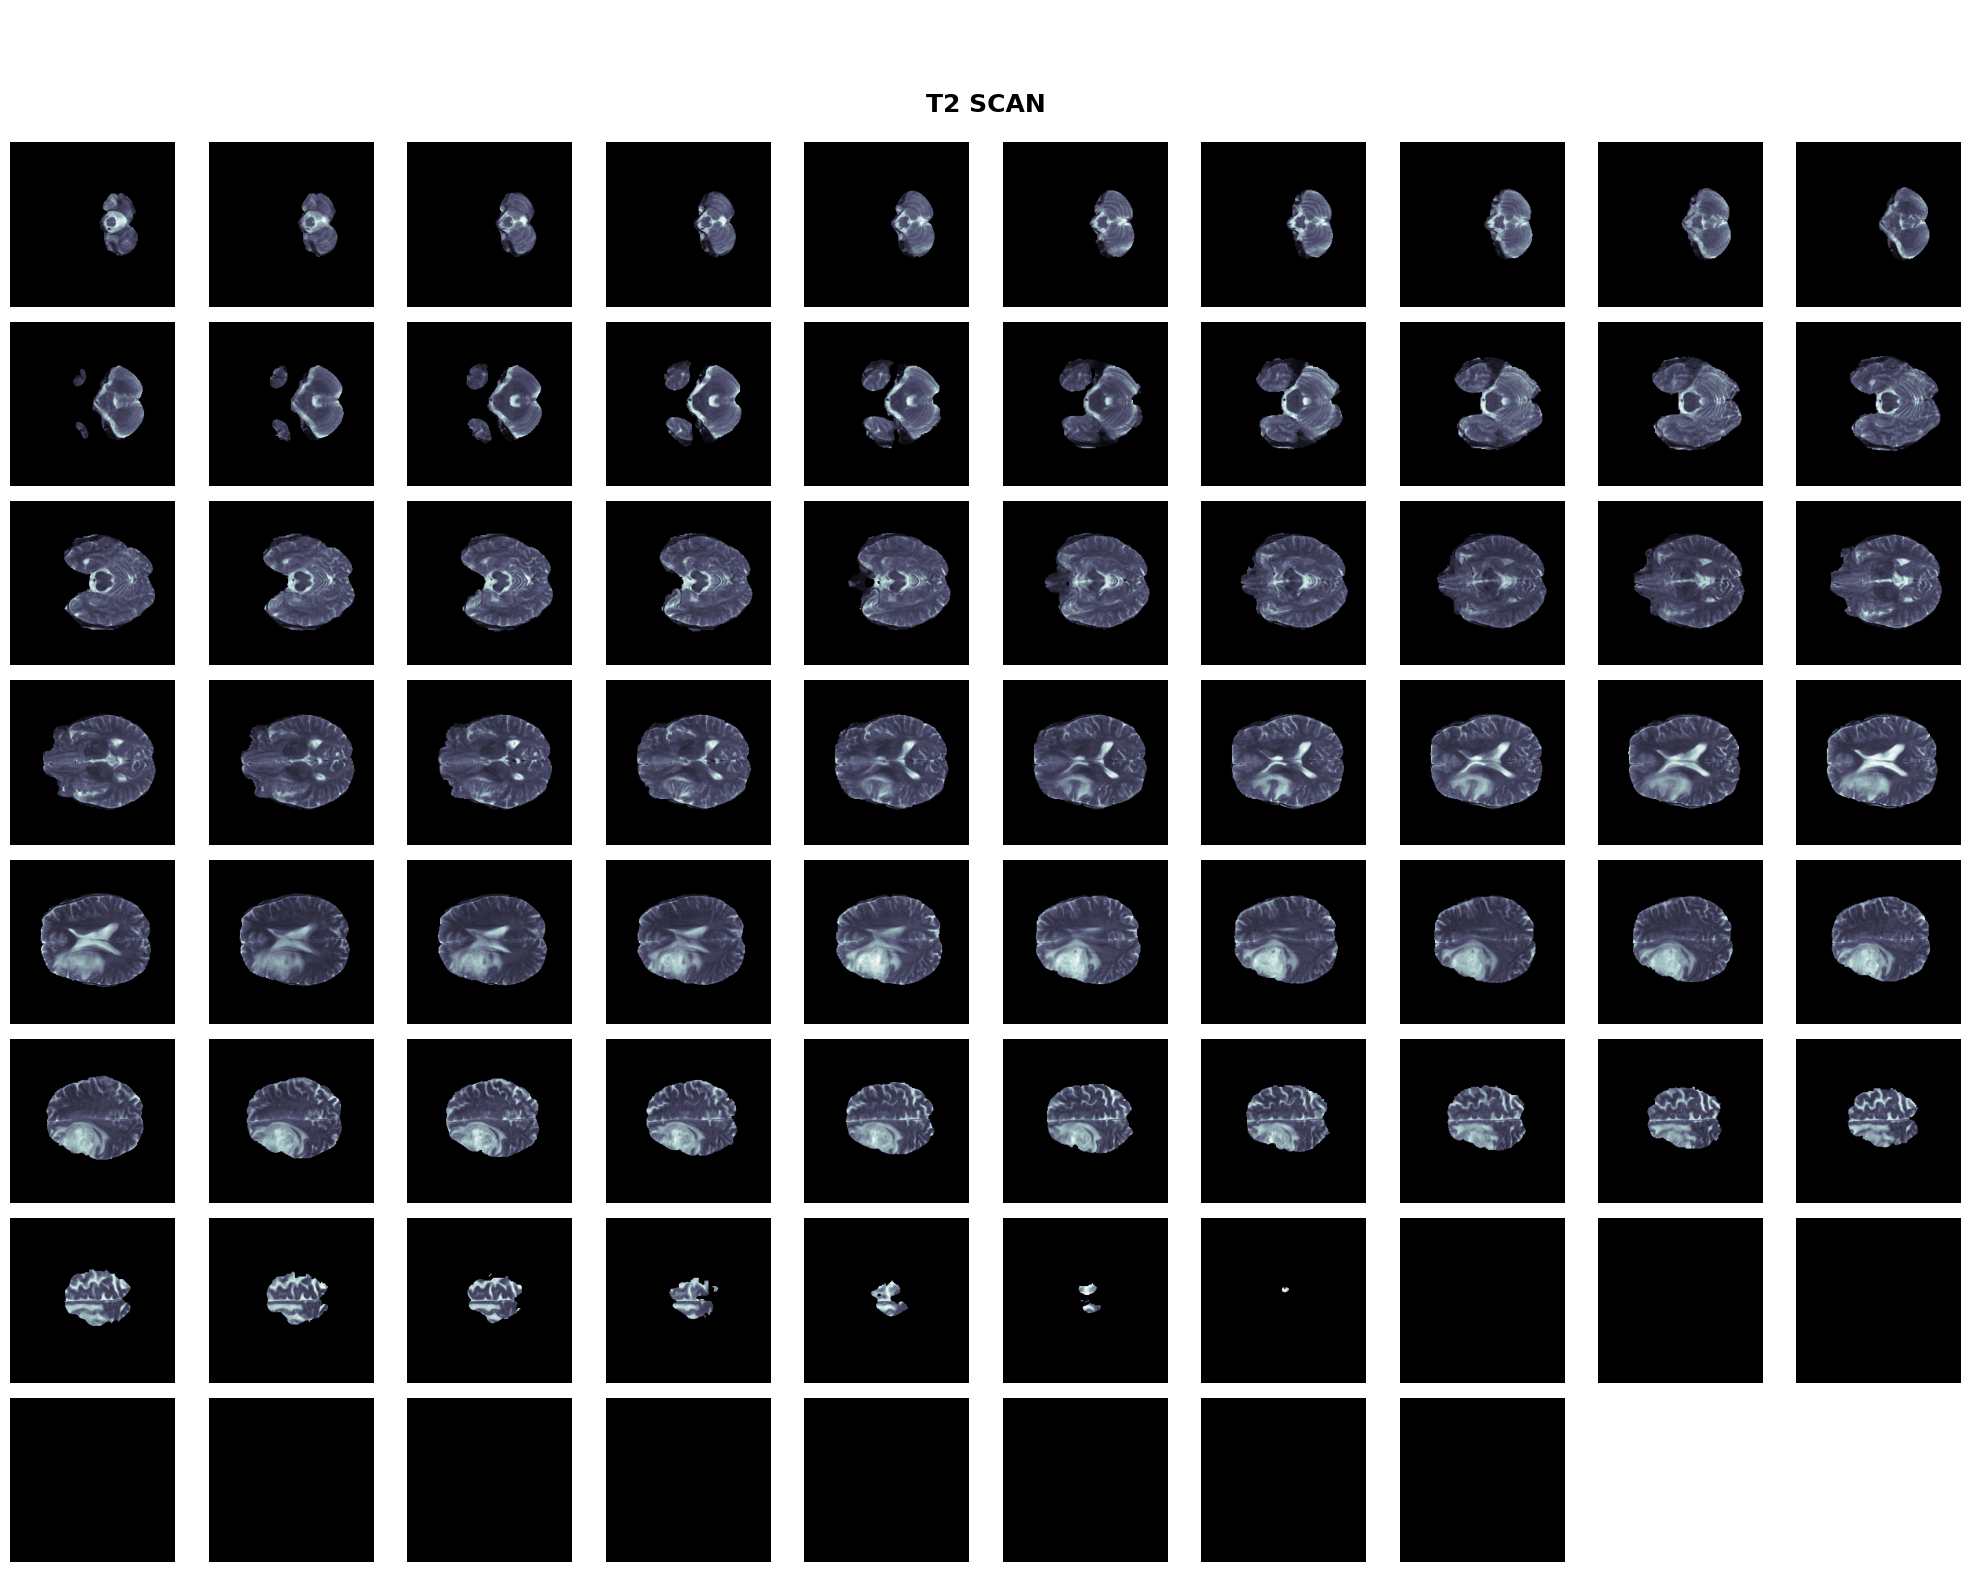

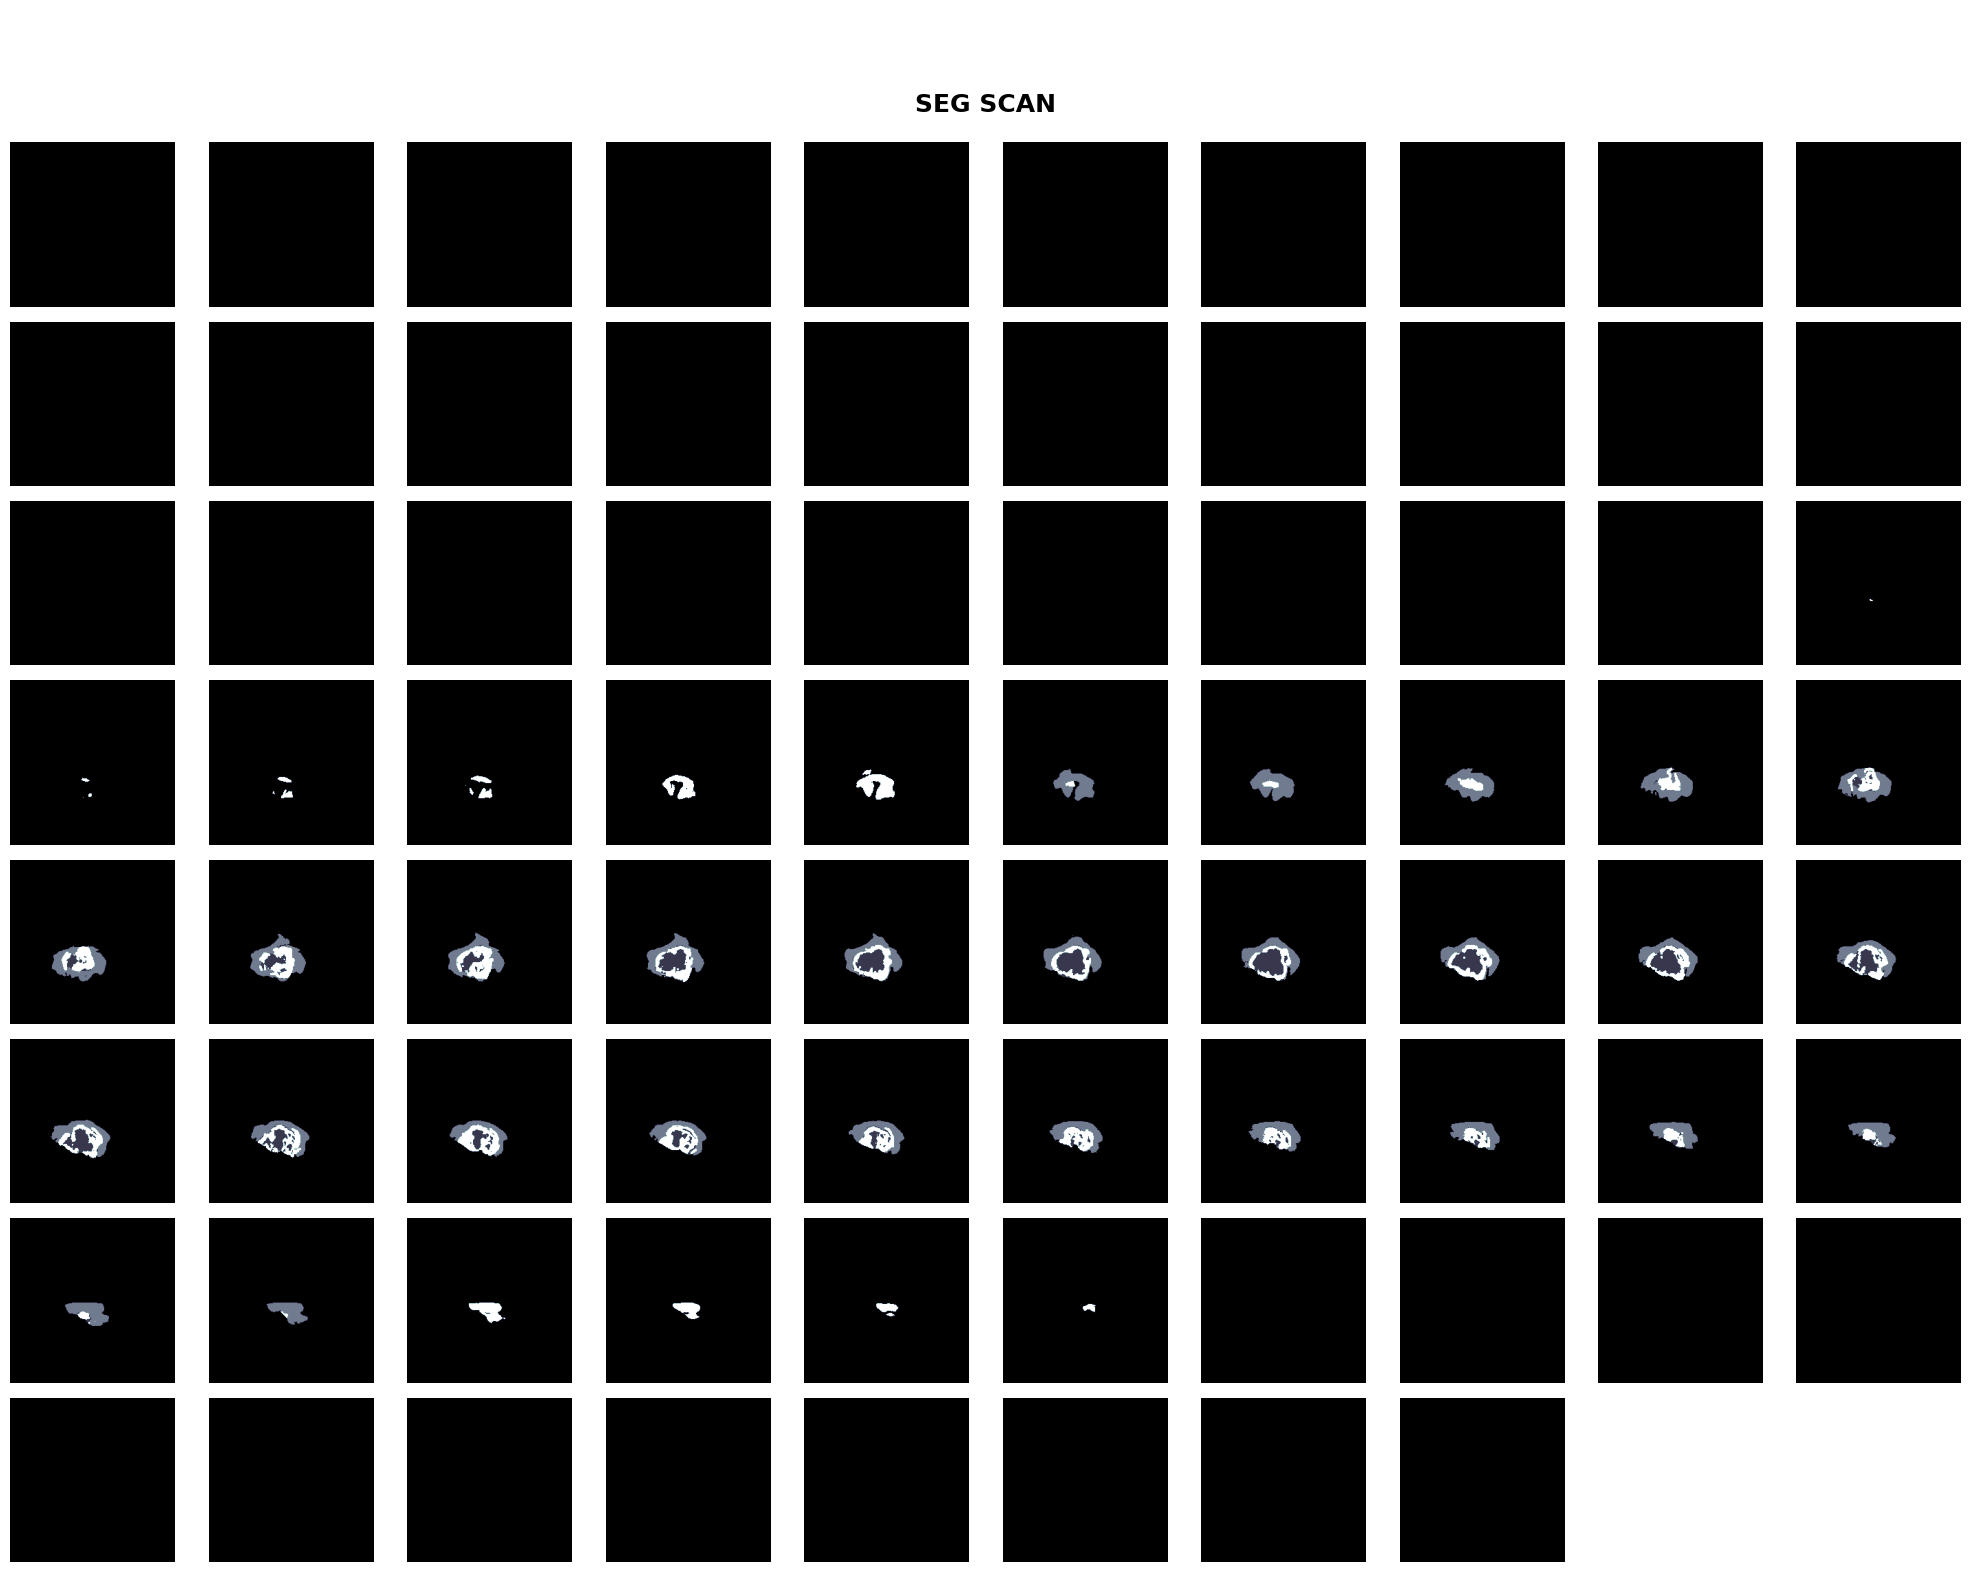

In [4]:
for i, nil in enumerate([f'./dataset/BraTS2021/BraTS2021_Training_Data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' \
                        for s_type in ['flair','t1','t1ce','t2','seg']]):    # PLOTTING
    image = nib.load(nil).get_fdata()
    slices = image.shape[-1]
    rows = int(np.ceil((slices/2)/10))
    plt.figure(figsize=(20, rows*2))
    plt.suptitle(f"\n\n\n{nil.rsplit('_', 1)[-1].split('.', 1)[0]} SCAN\n".upper(), fontsize=18, fontweight="bold")
    for j in range(0, slices, 2):
        plt.subplot(rows, 10, 1+j//2)
        plt.axis(False)
        plt.imshow(image[:, :, j], cmap="bone")
    plt.tight_layout()
    plt.show()

세그멘테이션 컬러맵 (NCR, ED, ET)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


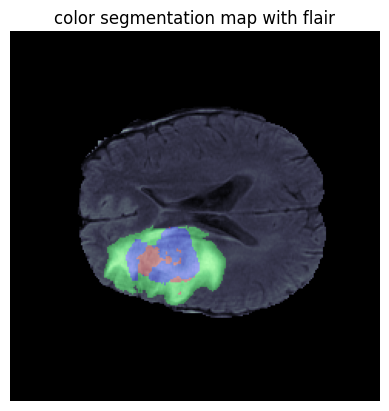

In [5]:
flair=flair_data[:,:,80]
seg=seg_data[:,:,80]

color_segmentation=np.zeros((240,240,3))
gray_segmentation=seg

color_segmentation[gray_segmentation == 1] = [255,0,0] # Red (Necrotic Tumor Core, NCR)
color_segmentation[gray_segmentation == 2] = [0,255,0] # Green (Edema, ED)
color_segmentation[gray_segmentation == 4] = [0,0,255] # Blue (Enhancing Tumor, ET)

plt.title('color segmentation map with flair')
plt.axis('off')
plt.imshow(flair,cmap='bone')
plt.imshow(color_segmentation,alpha=0.3,cmap='bone')

딥러닝에 사용되는 세그멘테이션 맵

In [7]:
smap=np.zeros((240,240,3))

ET (Enhancing Tumor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

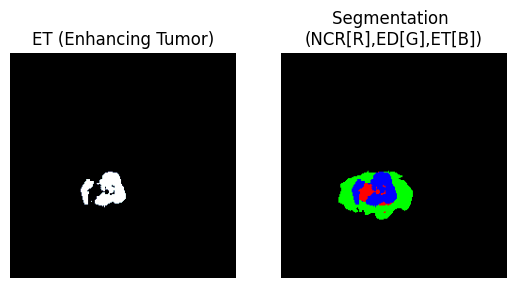

In [39]:
et=smap[:,:,0]
et_filter=np.where(gray_segmentation == 4)
et[gray_segmentation == 4] = 1

plt.subplot(1,2,1)
plt.title('ET (Enhancing Tumor)')
plt.imshow(et,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

WT (Whole Tumor) = (NCR + ET + ED)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

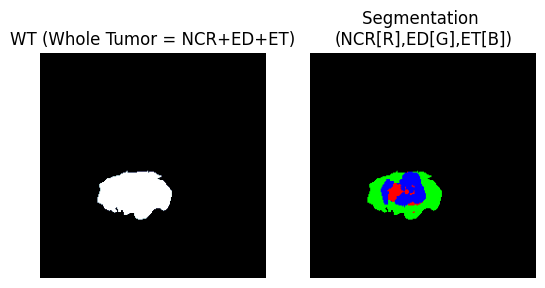

In [38]:
wt=smap[:,:,1]
wt_filter=np.where((gray_segmentation == 1) | (gray_segmentation == 4) | (gray_segmentation == 2))
wt[wt_filter] = 1

plt.subplot(1,2,1)
plt.title('WT (Whole Tumor = NCR+ED+ET)')
plt.imshow(wt,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

TC (Tumor Core) = (NCR + ET)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 239.5, 239.5, -0.5)

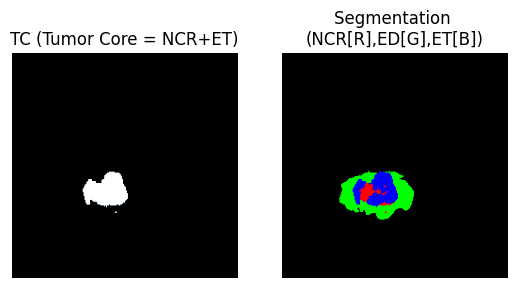

In [41]:
tc=smap[:,:,2]
tc_filter=np.where((gray_segmentation == 1) | (gray_segmentation == 4))
tc[tc_filter] = 1

plt.subplot(1,2,1)
plt.title('TC (Tumor Core = NCR+ET)')
plt.imshow(tc,cmap='bone')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation \n(NCR[R],ED[G],ET[B])')
plt.imshow(color_segmentation,cmap='bone')
plt.axis('off')

세그멘테이션 맵(smap)을 채널별로 시각화

(-0.5, 239.5, 239.5, -0.5)

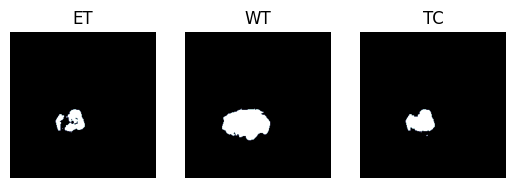

In [43]:
plt.subplot(1,3,1)
plt.title('ET')
plt.imshow(smap[:,:,0],cmap='bone')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('WT')
plt.imshow(smap[:,:,1],cmap='bone')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('TC')
plt.imshow(smap[:,:,2],cmap='bone')
plt.axis('off')

* 참고로 위 예시는 2d data를 기준으로 함 (smap = H x W x C = 240 x 240 x 3)
* 3d data가 출력이면 smap은 H x W x D x C가 돼야 함 <Dimension도 고려>